## Deep RNN - Clasificacion NMIST con LSTM & GRUs

In [27]:
import warnings
warnings.filterwarnings('ignore')

import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist;
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0 
x_test = x_test / 255.0 

print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [6]:
model = keras.models.Sequential([
    keras.layers.LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(128),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 59s 982us/step - loss: 0.3322 - accuracy: 0.8948 - val_loss: 0.0963 - val_accuracy: 0.9696
Epoch 2/3
60000/60000 [==============================] - 58s 969us/step - loss: 0.1033 - accuracy: 0.9707 - val_loss: 0.0659 - val_accuracy: 0.9803
Epoch 3/3
60000/60000 [==============================] - 58s 969us/step - loss: 0.0722 - accuracy: 0.9794 - val_loss: 0.0576 - val_accuracy: 0.9820


In [7]:
model = keras.models.Sequential([
    keras.layers.GRU(128, input_shape=(x_train.shape[1:]), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(128),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3207 - accuracy: 0.8958 - val_loss: 0.0930 - val_accuracy: 0.9717
Epoch 2/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0871 - accuracy: 0.9750 - val_loss: 0.0581 - val_accuracy: 0.9849
Epoch 3/3
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0614 - accuracy: 0.9827 - val_loss: 0.0467 - val_accuracy: 0.9852


Prediccion: 4


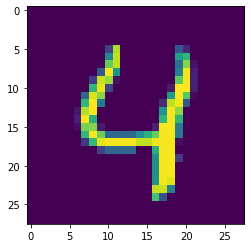

In [26]:
img = x_test[4]

# prediction ===
image = img
#image = np.expand_dims(image, -1)
y_pred = model.predict([[image]])
# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)
# imprimir la clase
print("Prediccion:",y_class[0])
# prediction ===

plt.imshow(img)